In [ ]:
import pandas as pd


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
path = "/content/gdrive/MyDrive/Praktikum/Praktikum07"

In [ ]:
df = pd.read_csv(path + '/data/apples_and_oranges.csv')
df.head()

,Weight,Size,Class
0,69,4.39,orange
1,69,4.21,orange
2,65,4.09,orange
3,72,5.85,apple
4,67,4.70,orange


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Weight  40 non-null     int64  
 1   Size    40 non-null     float64
 2   Class   40 non-null     object 
dtypes: float64(1), int64(1), object(1)
memory usage: 1.1+ KB


In [ ]:
df.describe()

,Weight,Size
count,40.000000,40.000000
mean,70.200000,4.922750
std,3.039906,0.590063
min,65.000000,4.010000
25%,68.000000,4.360000
50%,70.000000,4.930000
75%,73.000000,5.472500
max,75.000000,5.850000


In [ ]:
df.isnull().sum()

,0
Weight,0
Size,0
Class,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df['Class'].unique()

array(['orange', 'apple'], dtype=object)

In [ ]:
df['Class'] = df['Class'].map({'orange':0, 'apple':1})

In [ ]:
df['Class'].head()

,Class
0,0
1,0
2,0
3,1
4,0


In [ ]:
corr_matrix = df.corr(numeric_only=True)
corr_matrix

,Weight,Size,Class
Weight,1.000000,0.765027,0.849528
Size,0.765027,1.000000,0.900641
Class,0.849528,0.900641,1.000000


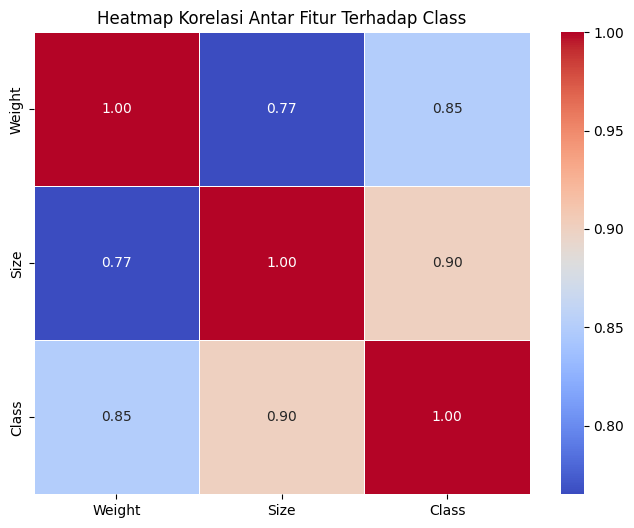

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Heatmap Korelasi Antar Fitur Terhadap Class", fontsize=12)
plt.show()

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
X = df[['Weight', 'Size']]
y = df['Class']

print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (40, 2)
y shape: (40,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Data latih:", X_train.shape)
print("Data uji:", X_test.shape)

Data latih: (32, 2)
Data uji: (8, 2)


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
preproses = ColumnTransformer(
    transformers=[
        ('scaler', StandardScaler(), ['Weight','Size']),
    ],
    remainder='drop'
)

model = LogisticRegression(
    max_iter=1000,
    solver='lbfgs',
    class_weight='balanced',
    random_state=42
)

clf = Pipeline([
    ('preproses', preproses),
    ('model', model)
])

# Latih model
clf.fit(X_train, y_train)
print("❤️ Model Logistic Regression berhasil dilatih.")

❤️ Model Logistic Regression berhasil dilatih.


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)[:, 1]
print(f"Akurasi    : {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision  : {precision_score(y_test, y_pred, zero_division=0):.4f}")
print(f"Recall     : {recall_score(y_test, y_pred, zero_division=0):.4f}")
print(f"F1-Score   : {f1_score(y_test, y_pred, zero_division=0):.4f}")
print(f"ROC-AUC    : {roc_auc_score(y_test, y_prob):.4f}")

Akurasi    : 1.0000
Precision  : 1.0000
Recall     : 1.0000
F1-Score   : 1.0000
ROC-AUC    : 1.0000


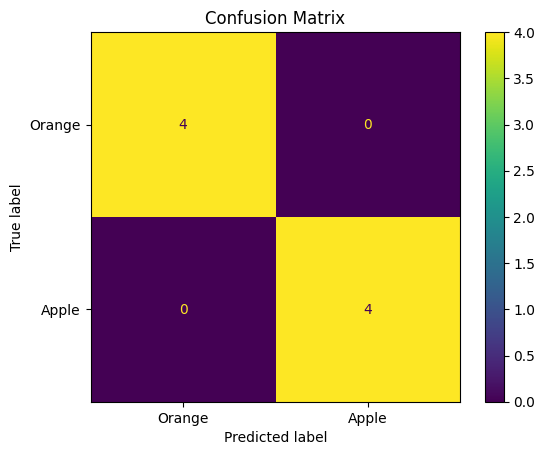

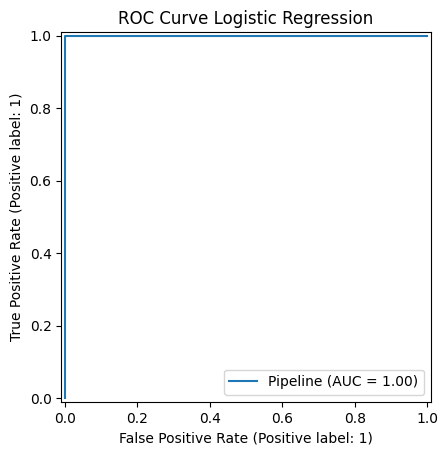

In [ ]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix, classification_report, RocCurveDisplay, ConfusionMatrixDisplay
)
ConfusionMatrixDisplay(
    confusion_matrix(y_test, y_pred),
    display_labels=['Orange', 'Apple']
).plot(values_format='d')
plt.title("Confusion Matrix")
plt.show()

# ROC Curve
RocCurveDisplay.from_estimator(clf, X_test, y_test)
plt.title("ROC Curve Logistic Regression")
plt.show()

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names=['Orange (0)', 'Apple (1)']))

              precision    recall  f1-score   support

  Orange (0)       1.00      1.00      1.00         4
   Apple (1)       1.00      1.00      1.00         4

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8



In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(clf, X, y, cv=5)

print("Skor tiap fold:", scores)
print("Rata-rata akurasi:", np.mean(scores))
print("Standar deviasi:", np.std(scores))

Skor tiap fold: [1. 1. 1. 1. 1.]
Rata-rata akurasi: 1.0
Standar deviasi: 0.0


In [ ]:
feat_names = ['Weight', 'Size']
coefs = clf.named_steps['model'].coef_[0]
odds = np.exp(coefs)

coef_df = pd.DataFrame({
    'Fitur': feat_names,
    'Koefisien (log-odds)': coefs,
    'Odds Ratio (e^coef)': odds
}).sort_values('Odds Ratio (e^coef)', ascending=False)

display(coef_df)

,Fitur,Koefisien (log-odds),Odds Ratio (e^coef)
1,Size,1.747794,5.741925
0,Weight,1.476284,4.376651


In [ ]:
df

,Weight,Size,Class
0,69,4.39,0
1,69,4.21,0
2,65,4.09,0
3,72,5.85,1
4,67,4.70,0
5,73,5.68,1
6,70,5.56,1
7,75,5.11,1
8,74,5.36,1
9,65,4.27,0


In [ ]:
data_baru = pd.DataFrame({
    'Weight': [70],
    'Size': [5.00]
})

pred = clf.predict(data_baru)
prob = clf.predict_proba(data_baru)[:, 1]

hasil = data_baru.copy()
hasil['Prob_Class'] = prob
hasil['Pred (0=orange, 1=apple)'] = pred
display(hasil)

,Weight,Size,Prob_Class,"Pred (0=orange, 1=apple)"
0,70,5.0,0.532809,1
